In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
pd.pandas.set_option('display.max_rows', None)

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [4]:
X = df.drop('Salary', axis=1)
y = df.Salary

In [5]:
# Question 1: Find the linear regression equation for this data using columns 1-5 to column 6.


In [6]:
reg = LinearRegression().fit(X, y)

In [7]:
y_pred = reg.predict(X)

In [8]:
# Question 2: Find the selection of columns with the best  R2  score.
reg.score(X, y)

0.8547180674410969

In [9]:
male_pred = reg.predict([[0, 1, 1 ,1,1]])
male_pred

array([16018.75312766])

In [10]:
female_pred = reg.predict([[1, 1, 1, 1, 1]])
female_pred

array([17260.54562726])

Sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

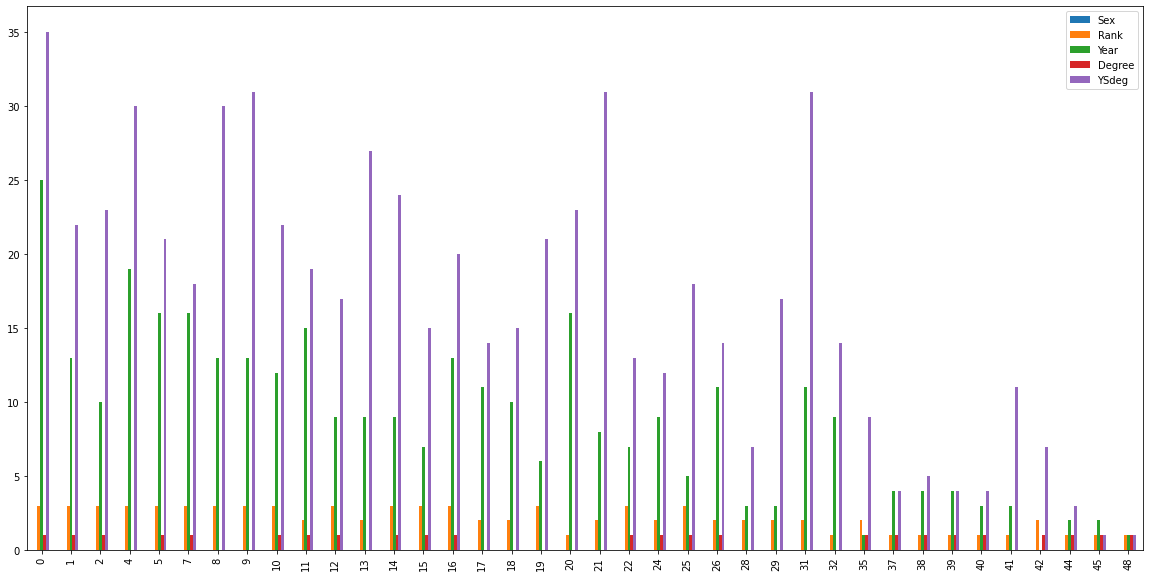

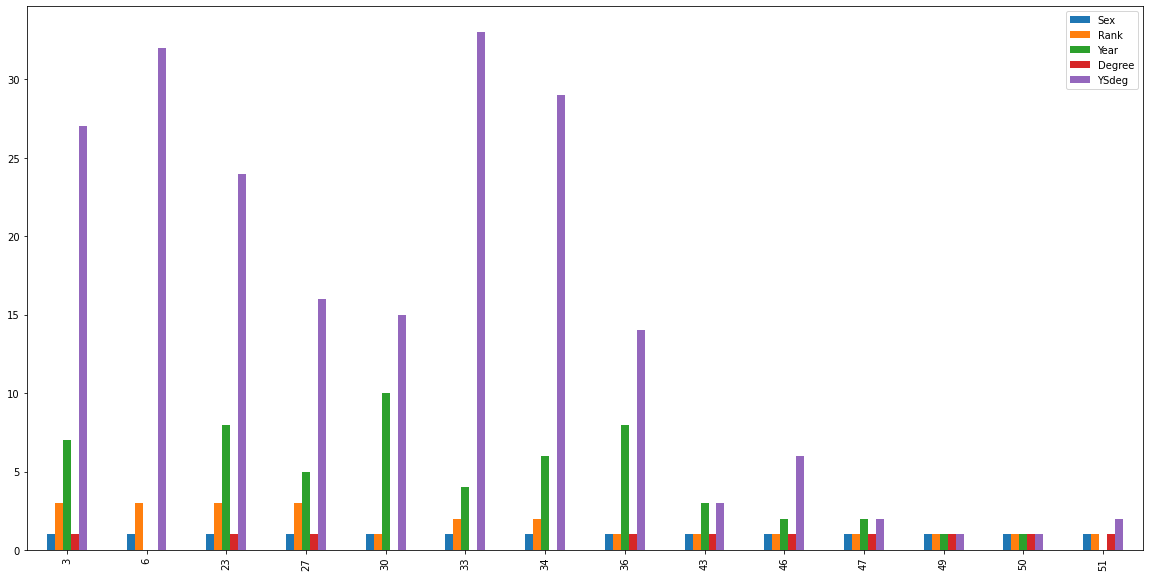

In [11]:
new_df = X.groupby('Sex')
new_df.plot(kind='bar', figsize=(20, 10))

In [12]:
X.pivot_table(index='Sex', aggfunc='median')

,Degree,Rank,YSdeg,Year
Sex,,,,
0,1,2,17.0,9.0
1,1,1,14.5,3.5


In [13]:
X.pivot_table(index='Sex', aggfunc='min')

,Degree,Rank,YSdeg,Year
Sex,,,,
0,0,1,1,0
1,0,1,1,0


In [14]:
X.pivot_table(index='Sex', aggfunc='max')

,Degree,Rank,YSdeg,Year
Sex,,,,
0,1,3,35,25
1,1,3,33,10


In [15]:
# using median Salary
# male with female
male_pred = reg.predict([[0, 1, 2, 17.0, 9]])
print('*male_pred {}'.format(male_pred))
female_pred = reg.predict([[1, 1, 2, 17.0, 9]])
print('female_pred {}'.format(female_pred))

# using median Salary
# female with male
female_pred = reg.predict([[1, 1, 2, 3.5, 14.5]])
print('*female_pred {}'.format(female_pred))
male_pred = reg.predict([[0, 1, 2, 3.5, 14.5]])
print('male_pred {}'.format(male_pred))

*male_pred [-5835.01670737]
female_pred [-4593.22420777]
*female_pred [12675.62249371]
male_pred [11433.82999411]


In [16]:
# using minimum Salary
# male with female
male_pred = reg.predict([[0, 1, 1, 1, 0]])
print('*male_pred {}'.format(male_pred))
female_pred = reg.predict([[1, 1, 1, 1, 0]])
print('female_pred {}'.format(female_pred))

#using minimum Salary
#female with male\
female_pred=reg.predict([[1, 0, 1, 1, 0]])
print("*female_pred {}".format(female_pred))
male_pred=reg.predict([[0, 0, 1, 1, 0]])
print('male_pred{}'.format(male_pred))

*male_pred [16147.5437012]
female_pred [17389.3362008]
*female_pred [11803.15475128]
male_pred[10561.36225168]


# There is no such difference in Salary